In [6]:
import pandas as pd


oil_prices = pd.DataFrame({ # due to OPEC or smth
    'year': [1970, 1971, 1972, 1973, 1974, 1975, 1976],
    'oil_price': [3.35, 3.56, 3.60, 4.75, 9.35, 9.85, 9.65]
})

country_codes = pd.DataFrame({
    'origin': [1, 2, 2, 3],
    'country': ['USA', 'Germany', 'Sweden', 'Japan'],
    'continent': ['North America', 'Europe', 'Europe', 'Asia']
})


cars1 = pd.read_csv('cars1.csv')


In [7]:
cars1.dropna(axis=1, how='all', inplace=True)
cars1.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin,car
0,18.0,8,307,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302,140,3449,10.5,70,1,ford torino


Merge cars1 with country_codes on 'origin'.
Ensure origin case '2' is split.
Exercise in merging on two columns

In [8]:
cars1['brands'] = [split[0] for split in cars1.car.str.split(' ')]
#cars1.head()

def country_from(code,brand):
    if code == 2:
        if brand in ['volkswagen', 'audi', 'vw']:
            return 'Germany'
        else:
            return 'Sweden'
    else:
        return country_codes[country_codes['origin'] == code].iloc[0, 1]
    
cars1['country'] = cars1[['origin','brands']].apply((lambda x : country_from(x[0],x[1])), axis=1)

car_continent = cars1.merge(country_codes, how='left', on=['origin', 'country'])
# technically specifying both columns for on is unnecessary
car_continent.tail(10)

/var/folders/6y/rk62psn975ddvqdgsb_mzxcm0000gn/T/ipykernel_62376/1556493998.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  cars1['country'] = cars1[['origin','brands']].apply((lambda x : country_from(x[0],x[1])), axis=1)


,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin,car,brands,country,continent
188,16.0,8,318,150,4190,13.0,76,1,dodge coronet brougham,dodge,USA,North America
189,15.5,8,304,120,3962,13.9,76,1,amc matador,amc,USA,North America
190,14.5,8,351,152,4215,12.8,76,1,ford gran torino,ford,USA,North America
191,22.0,6,225,100,3233,15.4,76,1,plymouth valiant,plymouth,USA,North America
192,22.0,6,250,105,3353,14.5,76,1,chevrolet nova,chevrolet,USA,North America
193,24.0,6,200,81,3012,17.6,76,1,ford maverick,ford,USA,North America
194,22.5,6,232,90,3085,17.6,76,1,amc hornet,amc,USA,North America
195,29.0,4,85,52,2035,22.2,76,1,chevrolet chevette,chevrolet,USA,North America
196,24.5,4,98,60,2164,22.1,76,1,chevrolet woody,chevrolet,USA,North America
197,29.0,4,90,70,1937,14.2,76,2,vw rabbit,vw,Germany,Europe


Merging oil prices and model year for time series.

In [9]:
# Cleaning oil prices

oil_prices['year'] = oil_prices['year'].mod(100)
oil_prices.head()
cars1.rename(columns={'model':'year'}, inplace=True)

cars1 = cars1.merge(oil_prices, how='left', on='year')

cars1.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,car,brands,country,oil_price
0,18.0,8,307,130,3504,12.0,70,1,chevrolet chevelle malibu,chevrolet,USA,3.35
1,15.0,8,350,165,3693,11.5,70,1,buick skylark 320,buick,USA,3.35
2,18.0,8,318,150,3436,11.0,70,1,plymouth satellite,plymouth,USA,3.35
3,16.0,8,304,150,3433,12.0,70,1,amc rebel sst,amc,USA,3.35
4,17.0,8,302,140,3449,10.5,70,1,ford torino,ford,USA,3.35


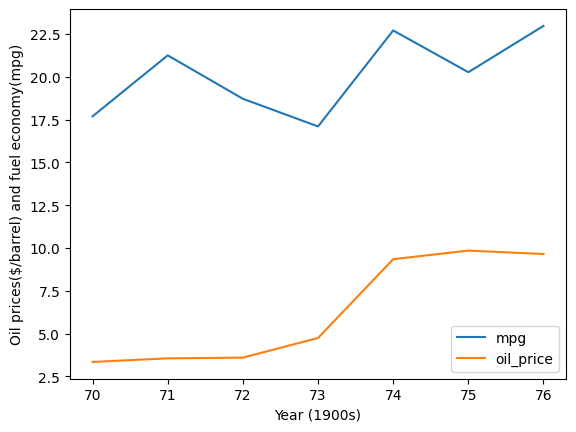

In [10]:
cars_avg = cars1.groupby('year').mean(numeric_only=True)

plot = cars_avg.plot(y=['mpg','oil_price'], kind='line', xlabel= "Year (1900s)", ylabel='Oil prices($/barrel) and fuel economy(mpg)')
figure = plot.get_figure()